ASSIGNMENT-2 
By Akhila M S

1.Use random function in python. And generate a Normal distribution between 1 to 20 with interval of 0.5.  
Plot the distribution using mathplotlib 
calculate mean, median, variance and standard deviation. 

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#generating a normal distribtion between 1 to 20 with interval of 0.5

In [7]:
x = np.arange(1,20,0.5)
print(x)

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]


In [8]:
#calculating mean median variance and standard deviation.

In [9]:
mean=x.mean()
print(mean)

10.25


In [10]:
median=np.median(x)
print(median)

10.25


In [11]:
variance=np.var(x)
print(variance)

30.0625


In [12]:
sd=np.std(x)
print(sd)

5.482928049865327


In [18]:
#ploting the distibution

In [14]:
dist = dist = norm.pdf(x,mean,sd)
print(dist)

[0.01753328 0.02036441 0.02345681 0.02679504 0.03035487 0.03410286
 0.03799632 0.0419837  0.04600534 0.04999473 0.05388012 0.05758659
 0.06103832 0.06416115 0.06688521 0.0691475  0.07089429 0.07208327
 0.07268521 0.07268521 0.07208327 0.07089429 0.0691475  0.06688521
 0.06416115 0.06103832 0.05758659 0.05388012 0.04999473 0.04600534
 0.0419837  0.03799632 0.03410286 0.03035487 0.02679504 0.02345681
 0.02036441 0.01753328]


Text(0, 0.5, 'Probability Density')

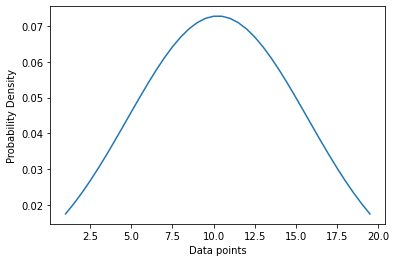

In [16]:
plt.plot(x,dist)
plt.xlabel('Data points')
plt.ylabel('Probability Density')

2.Mall dataset

In [23]:
df = pd.read_csv('Downloads/clustering/clustering_mall_dataset/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
sns.set_style("darkgrid")

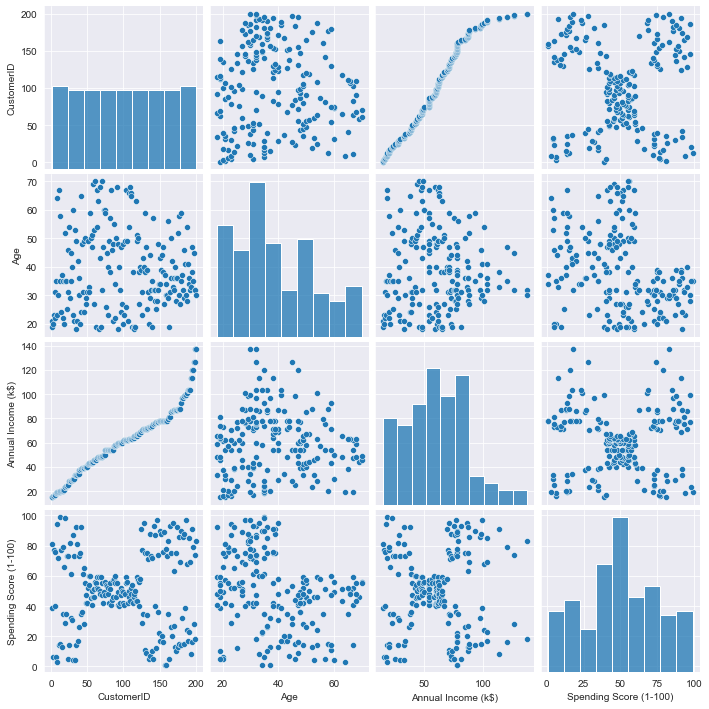

In [25]:
sns.pairplot(df)

In [26]:
### Segragating customers into 3 groups/clusters based on Spending Score

In [28]:
def score_tag(score):
    if score > 66:
        return "High"
    elif score > 33:
        return "Medium"
    else:
        return "Low"
    
df["Score Tag"] = df.apply(lambda x: score_tag(x["Spending Score (1-100)"]), axis=1)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Score Tag
0,1,Male,19,15,39,Medium
1,2,Male,21,15,81,High
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,High
4,5,Female,31,17,40,Medium
...,...,...,...,...,...,...
195,196,Female,35,120,79,High
196,197,Female,45,126,28,Low
197,198,Male,32,126,74,High
198,199,Male,32,137,18,Low


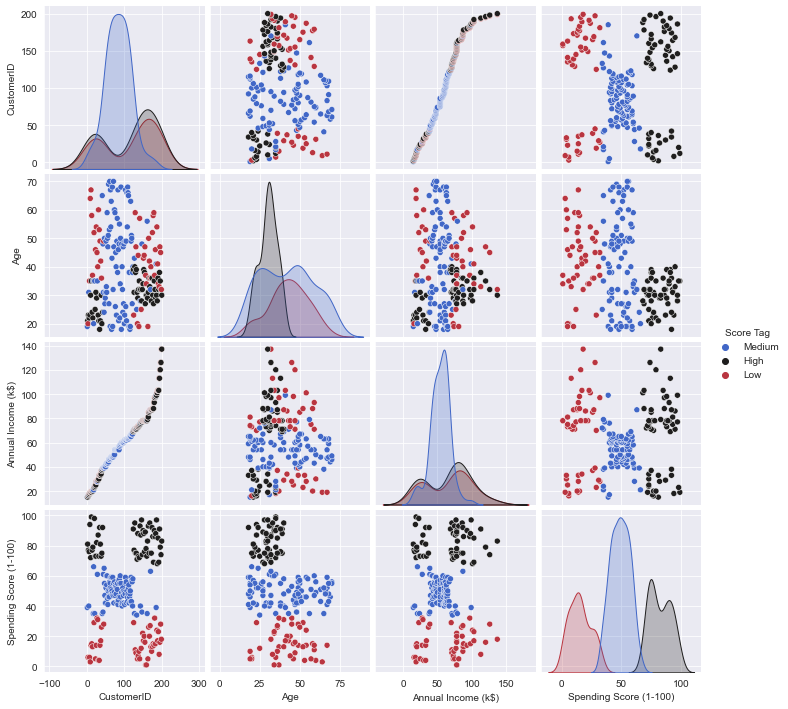

In [30]:
sns.pairplot(df, hue="Score Tag", palette="icefire")

In [32]:
import category_encoders as ce

In [33]:
encoder = ce.OrdinalEncoder(cols=['Gender'],return_df=True,
                           mapping=[{'col':'Gender', 
                                     'mapping':{'Male':0, 'Female':1}}])

In [34]:
X = df.drop(["Score Tag","CustomerID", "Spending Score (1-100)"], axis=1)
X

,Gender,Age,Annual Income (k$)
0,Male,19,15
1,Male,21,15
2,Female,20,16
3,Female,23,16
4,Female,31,17
...,...,...,...
195,Female,35,120
196,Female,45,126
197,Male,32,126
198,Male,32,137


In [35]:
y = df["Score Tag"]

In [36]:
X_transformed = encoder.fit_transform(X)

c:\users\akhila\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [37]:
X_transformed.columns

Index(['Gender', 'Age', 'Annual Income (k$)'], dtype='object')

BY K-means

In [39]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [40]:
labels = km.fit_predict(X_transformed)

In [41]:
df["labels_kmeans"] = labels

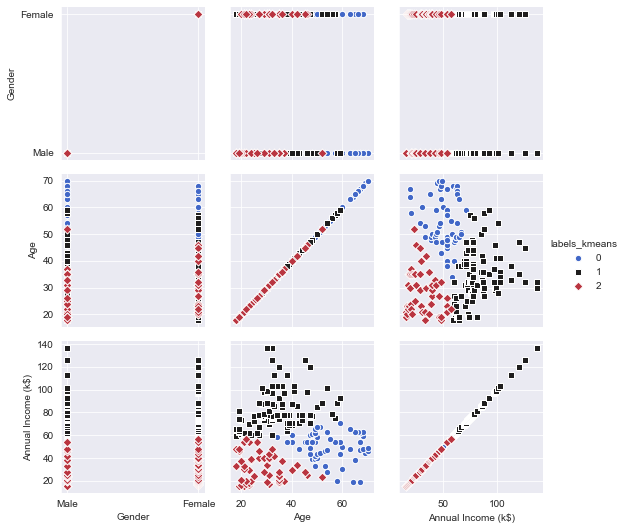

In [42]:
g = sns.PairGrid(df, hue="labels_kmeans", palette="icefire", hue_kws={"marker": ["o", "s", "D"]}, vars=['Gender', 'Age', 'Annual Income (k$)'])
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()
plt.show()

Guassian mixture model

In [43]:
from sklearn.mixture import GaussianMixture

In [44]:
gm = GaussianMixture(n_components=3).fit(X_transformed)

In [45]:
labels = gm.predict(X_transformed)
df['labels_gaussian']= labels

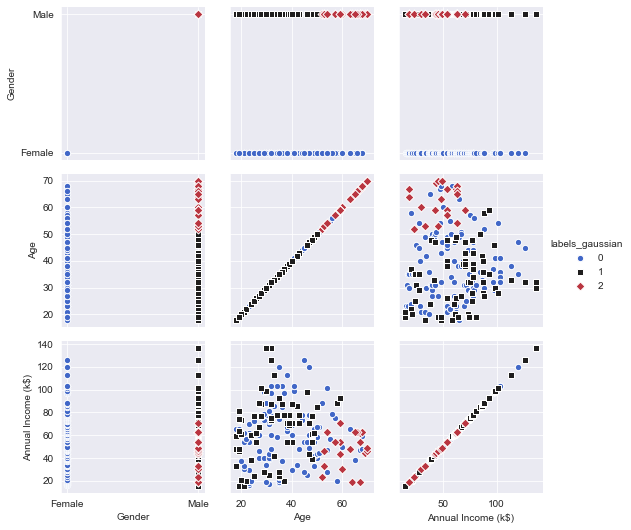

In [46]:
g = sns.PairGrid(df, hue="labels_gaussian", palette="icefire", hue_kws={"marker": ["o", "s", "D"]}, vars=['Gender', 'Age', 'Annual Income (k$)'])
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()
plt.show()

Hirarchial clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
ac = AgglomerativeClustering(n_clusters=3).fit(X_transformed)

In [54]:
labels = ac.fit_predict(X_transformed)
df['labels_agglomerative']= labels

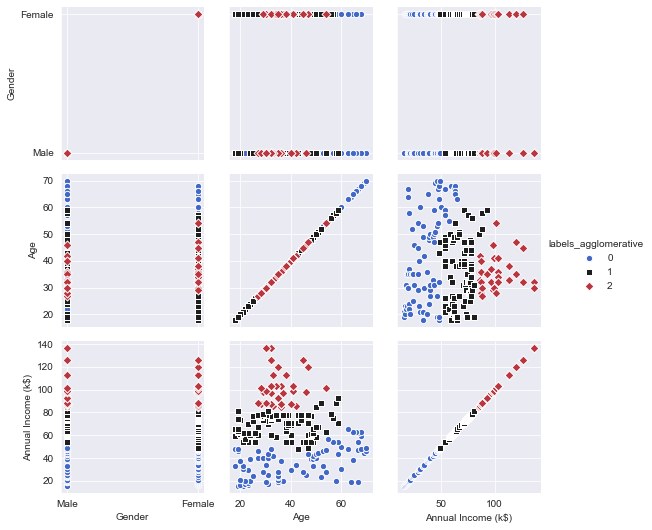

In [55]:
g = sns.PairGrid(df, hue="labels_agglomerative", palette="icefire", hue_kws={"marker": ["o", "s", "D"]}, vars=['Gender', 'Age', 'Annual Income (k$)'])
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()
plt.show()

Mean-Shift method

In [47]:
from sklearn.cluster import MeanShift

In [48]:
ms = MeanShift().fit(X_transformed)

In [49]:
labels = gm.predict(X_transformed)
df['labels_meanshift']= labels

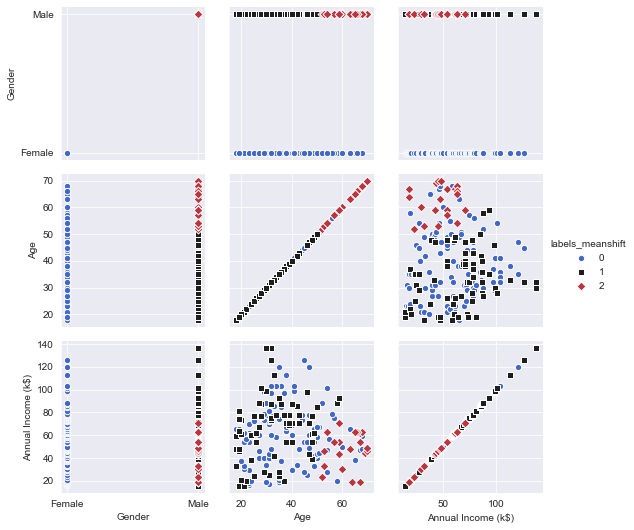

In [50]:
g = sns.PairGrid(df, hue="labels_meanshift", palette="icefire", hue_kws={"marker": ["o", "s", "D"]}, vars=['Gender', 'Age', 'Annual Income (k$)'])
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()
plt.show()